In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv(r'funda_train.csv', encoding='utf-8-sig')
print(df)

         store_id  card_id card_company transacted_date transacted_time  \
0               0        0            b      2016-06-01           13:13   
1               0        1            h      2016-06-01           18:12   
2               0        2            c      2016-06-01           18:52   
3               0        3            a      2016-06-01           20:22   
4               0        4            c      2016-06-02           11:06   
...           ...      ...          ...             ...             ...   
6556608      2136  4663855            d      2019-02-28           23:20   
6556609      2136  4663855            d      2019-02-28           23:24   
6556610      2136  4663489            a      2019-02-28           23:24   
6556611      2136  4663856            d      2019-02-28           23:27   
6556612      2136  4658616            c      2019-02-28           23:54   

         installment_term  region type_of_business       amount  
0                       0     NaN

In [5]:
pd.set_option('display.max_columns', 15)
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [6]:
df0 = df.fillna(0)
df0

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,0,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,0,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,0,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,0,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,0,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [7]:
# transacted_date, transacted_time 데이터 타입 string으로 인식하여 datetime64로 변환(column.dt.시간단위를 통해서 원하는 시간 부분을 추출해서 활용할 수 있음)
df0['transacted_date'] = pd.to_datetime(df0['transacted_date'])
df0['transacted_time'] = pd.to_datetime(df0['transacted_time'])

In [8]:
from datetime import *

In [22]:
#일자별 매출 그룹바이
daily_amount = df0.groupby(['store_id','transacted_date'])['amount'].sum()
daily_amount

store_id  transacted_date
0         2016-06-01         12571.428571
          2016-06-02         40571.428571
          2016-06-03         18142.857143
          2016-06-04         31714.285714
          2016-06-05         10428.571429
                                 ...     
2136      2019-02-24         85357.142857
          2019-02-25         37214.285714
          2019-02-26         47142.857143
          2019-02-27         65071.428571
          2019-02-28         65857.142857
Name: amount, Length: 1286113, dtype: float64

In [23]:
daily_amount = daily_amount.reset_index()

In [24]:
#인덱스를 거래일자로 재설정
daily_amount.index = daily_amount['transacted_date']
daily_amount.set_index('transacted_date', inplace=True)
daily_amount.head()

,store_id,amount
transacted_date,,
2016-06-01,0,12571.428571
2016-06-02,0,40571.428571
2016-06-03,0,18142.857143
2016-06-04,0,31714.285714
2016-06-05,0,10428.571429


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 한글폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"#폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')#스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 지정

<AxesSubplot:xlabel='transacted_date'>

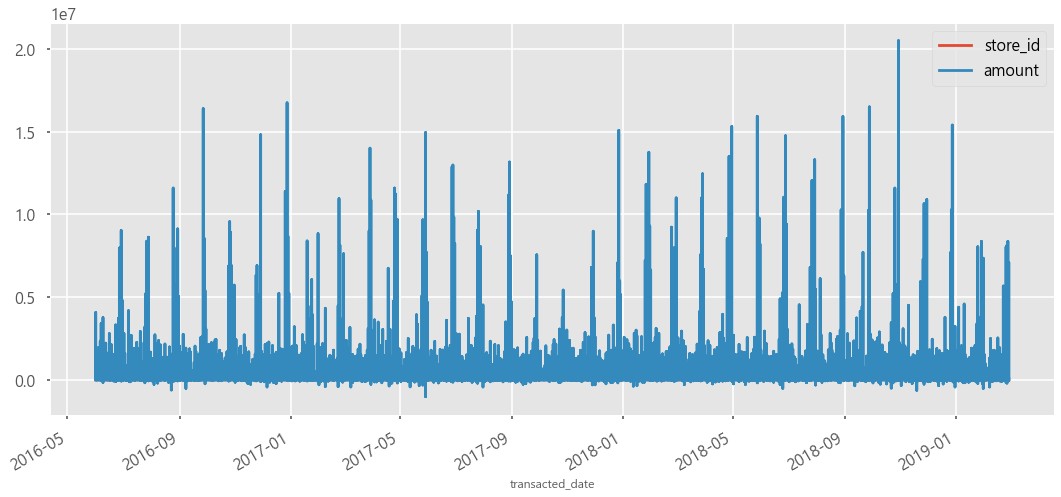

In [36]:
#일자별 매출 시각화
daily_amount.plot()
plt.show()

## ARIMA 모델 ##

### 전처리 ###

In [21]:
from pylab import rcParams
import statsmodels.api as sm
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [41]:
# 월별 판매 예측
salesbymonth = daily_amount.amount.resample('M').sum()
salesbymonth

transacted_date
2016-06-30    1.565927e+09
2016-07-31    1.631030e+09
2016-08-31    1.631913e+09
2016-09-30    1.616485e+09
2016-10-31    1.770040e+09
2016-11-30    1.789135e+09
2016-12-31    1.993133e+09
2017-01-31    1.787146e+09
2017-02-28    1.824069e+09
2017-03-31    2.144957e+09
2017-04-30    2.144388e+09
2017-05-31    2.316093e+09
2017-06-30    2.266990e+09
2017-07-31    2.284421e+09
2017-08-31    2.208400e+09
2017-09-30    2.278157e+09
2017-10-31    2.081597e+09
2017-11-30    2.188137e+09
2017-12-31    2.312373e+09
2018-01-31    2.114483e+09
2018-02-28    1.953435e+09
2018-03-31    2.356962e+09
2018-04-30    2.280303e+09
2018-05-31    2.321865e+09
2018-06-30    2.194311e+09
2018-07-31    2.241846e+09
2018-08-31    2.174102e+09
2018-09-30    2.129888e+09
2018-10-31    2.279253e+09
2018-11-30    2.208414e+09
2018-12-31    2.263730e+09
2019-01-31    2.165602e+09
2019-02-28    1.900401e+09
Freq: M, Name: amount, dtype: float64

In [44]:
salesbymonth = salesbymonth.reset_index()

In [45]:
#인덱스를 거래월자로 재설정
salesbymonth.index = salesbymonth['transacted_date']
salesbymonth.set_index('transacted_date', inplace=True)
salesbymonth.head()

,amount
transacted_date,
2016-06-30,1.565927e+09
2016-07-31,1.631030e+09
2016-08-31,1.631913e+09
2016-09-30,1.616485e+09
2016-10-31,1.770040e+09


<AxesSubplot:xlabel='transacted_date'>

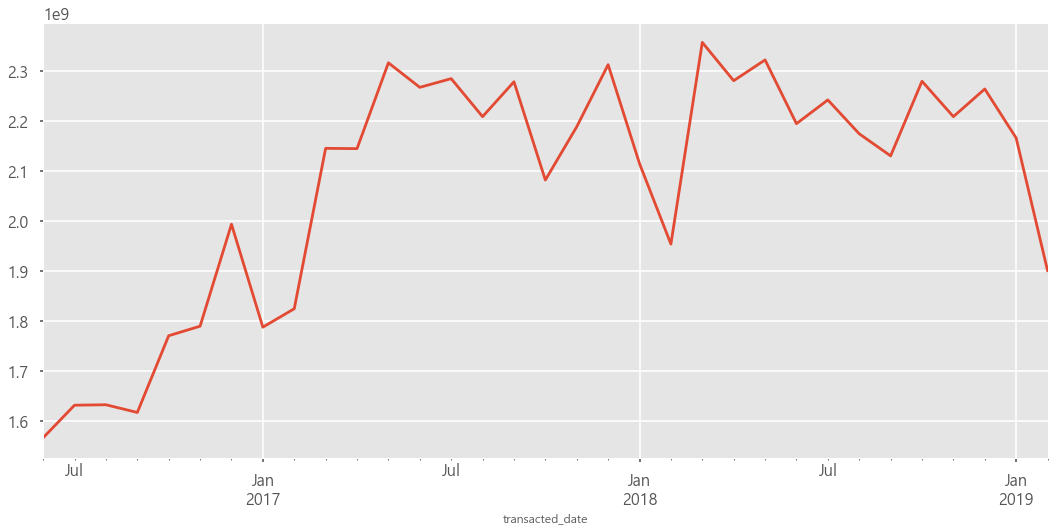

In [37]:
salesbymonth.plot()

<AxesSubplot:xlabel='transacted_date'>

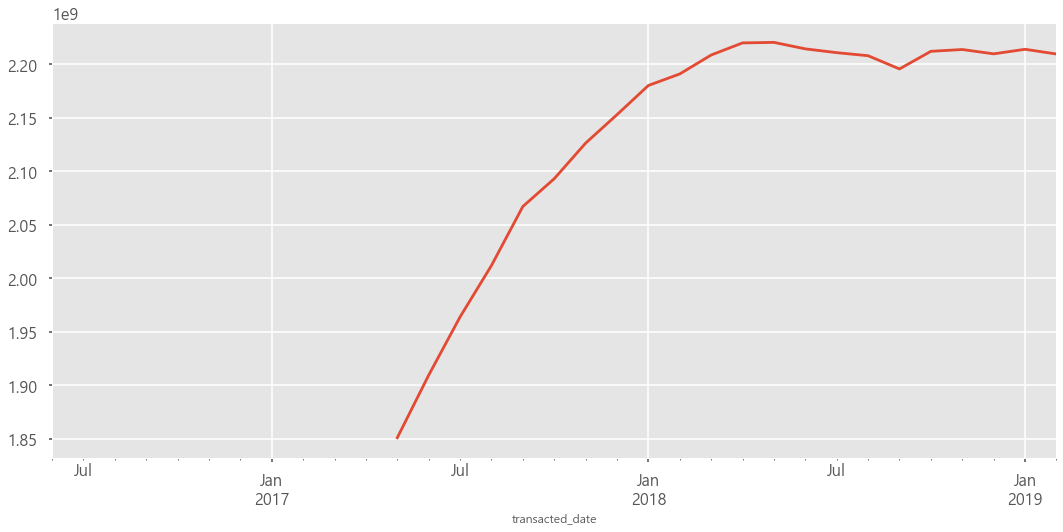

In [46]:
# stationary 확인

timeseries = salesbymonth['amount']
timeseries.rolling(12).mean().plot()#12개월평균

<AxesSubplot:xlabel='transacted_date'>

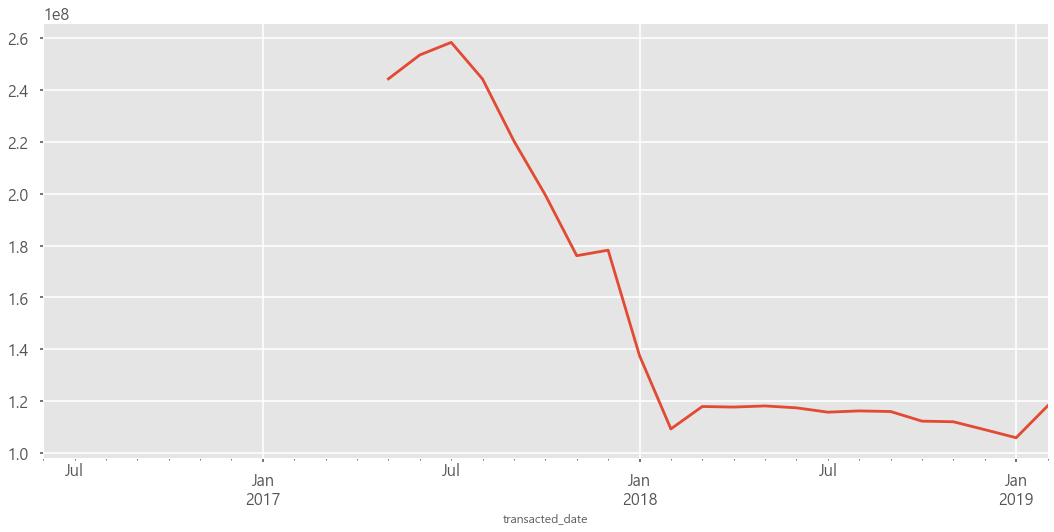

In [47]:
timeseries.rolling(12).std().plot()#12개월분산

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
decomposition = seasonal_decompose(salesbymonth['amount'])

<Figure size 1296x576 with 0 Axes>

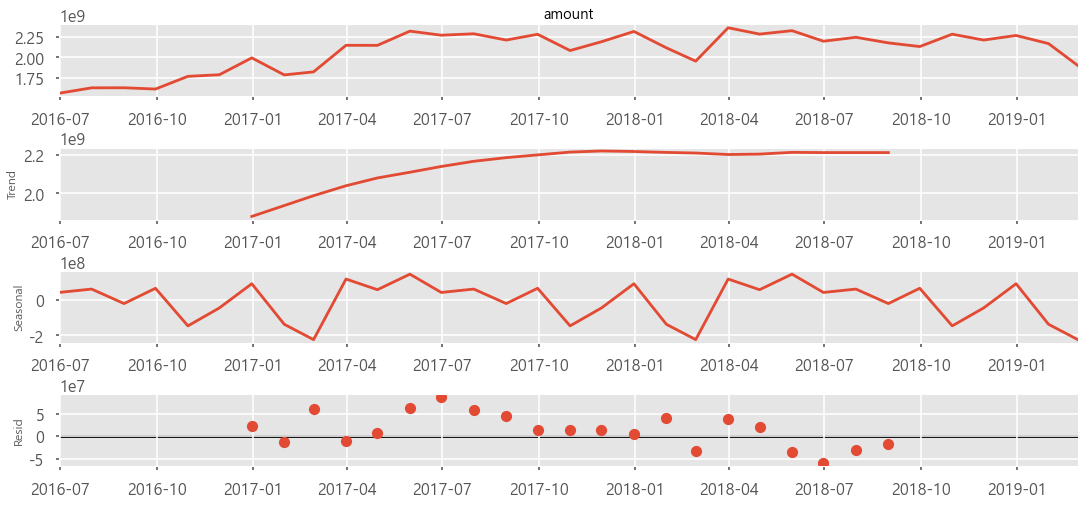

In [53]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,7)

## stationary 검증 방법 ##

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
result = adfuller(salesbymonth['amount'])

In [64]:
result
#  0.12033314079559654-> p값 0.05보다 작아야 stationary -> 즉 stationary가 아니다

(-2.4803330016522223,
 0.12033314079559654,
 0,
 32,
 {'1%': -3.653519805908203,
  '5%': -2.9572185644531253,
  '10%': -2.6175881640625},
 882.2547886536667)

###    - 검증 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
     -> 귀무가설(H0): non-stationary.
     -> 대체가설 (H1): stationary. 

In [65]:
# stationary check 기능 함수
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <=0.05:
        print('Stationary{}'.format(result[1]))
    else:
        print('Non-stationary {}'.format(result[1]))

In [66]:
adf_check(salesbymonth['amount'])

Non-stationary 0.12033314079559654


## differencing ##

In [67]:
salesbymonth['1st diff'] = salesbymonth['amount'] - salesbymonth['amount'].shift(1)

In [69]:
salesbymonth.head()

,amount,1st diff
transacted_date,,
2016-06-30,1.565927e+09,NaN
2016-07-31,1.631030e+09,6.510308e+07
2016-08-31,1.631913e+09,8.831253e+05
2016-09-30,1.616485e+09,-1.542843e+07
2016-10-31,1.770040e+09,1.535552e+08


In [70]:
adf_check(salesbymonth['1st diff'].dropna())

Stationary7.548025158012783e-05


<AxesSubplot:xlabel='transacted_date'>

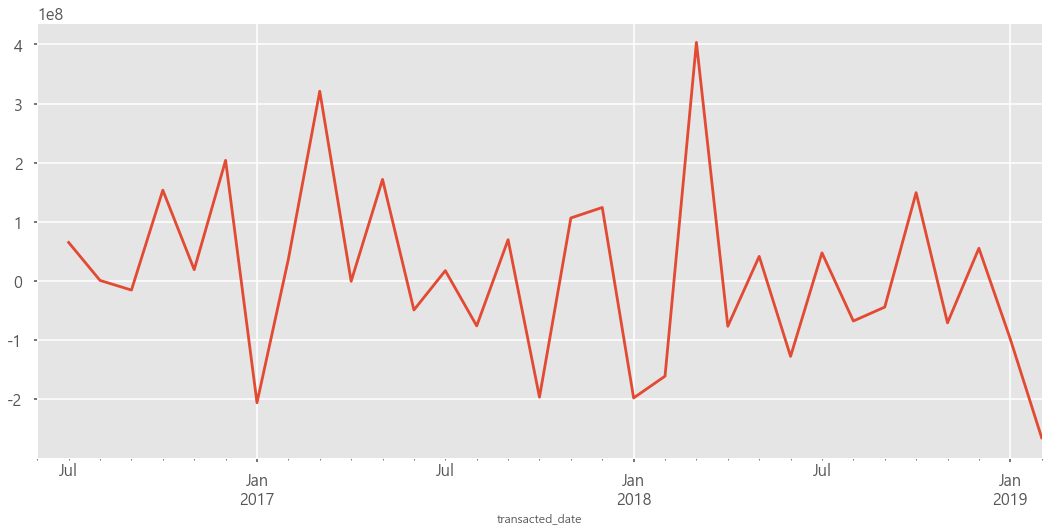

In [71]:
salesbymonth['1st diff'].plot()

## 2차 differencing ##

In [72]:
salesbymonth['2nd diff'] = salesbymonth['1st diff'] - salesbymonth['1st diff'].shift(1)

<AxesSubplot:xlabel='transacted_date'>

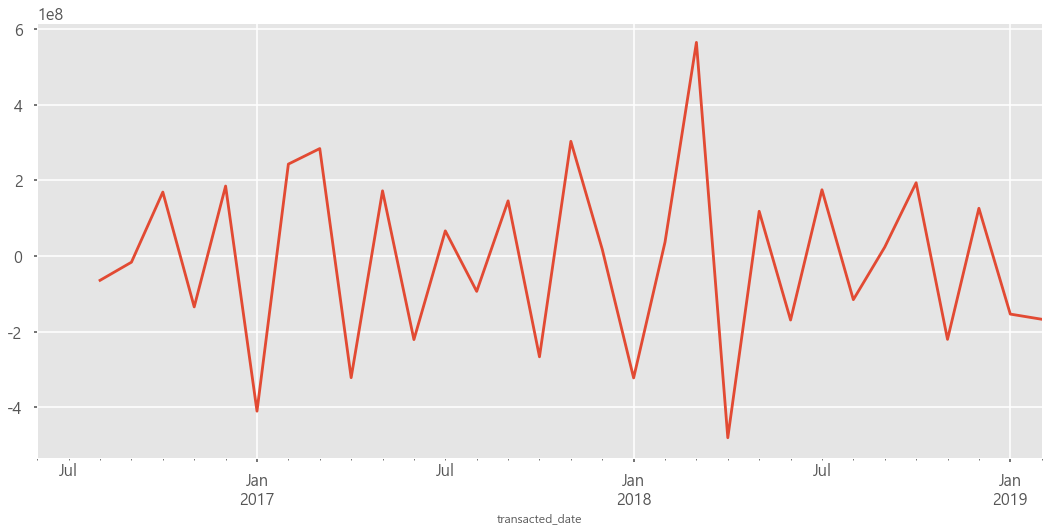

In [73]:
salesbymonth['2nd diff'].plot()

In [74]:
adf_check(salesbymonth['2nd diff'].dropna())

Stationary5.406048999294243e-07


## 3차 differencing ##

In [98]:
salesbymonth['3rd diff'] = salesbymonth['2nd diff'] - salesbymonth['2nd diff'].shift(1)

### 1차 differencing보다 더 작아짐 1st, 2nd 둘다 사용 가능 ###

In [80]:
salesbymonth['seasonal diff'] = salesbymonth['amount'] - salesbymonth['amount'].shift(12)

<AxesSubplot:xlabel='transacted_date'>

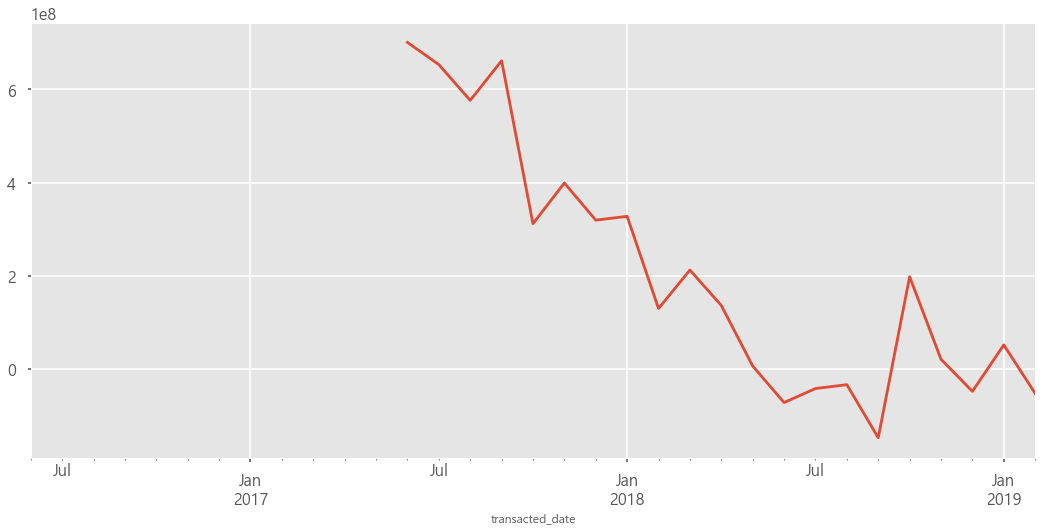

In [81]:
salesbymonth['seasonal diff'].plot()

In [82]:
adf_check(salesbymonth['seasonal diff'].dropna())

Non-stationary 0.1219271533339864


In [83]:
# 1st differencing에 seasonal differencing을 하는 것도 방법임

In [84]:
salesbymonth['seasonal 1st diff'] = salesbymonth['1st diff'] - salesbymonth['1st diff'].shift(12)

<AxesSubplot:xlabel='transacted_date'>

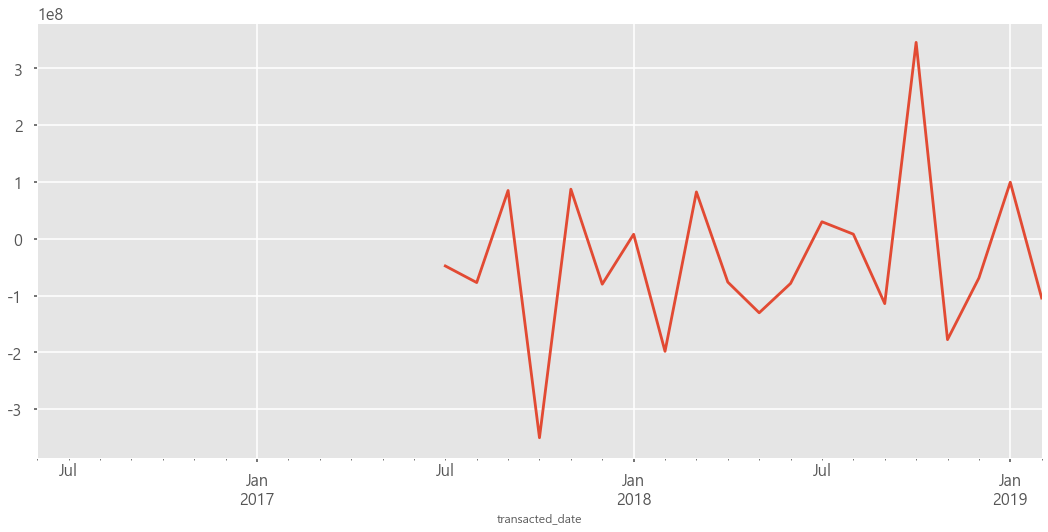

In [85]:
salesbymonth['seasonal 1st diff'].plot()

In [86]:
adf_check(salesbymonth['seasonal 1st diff'].dropna())

Non-stationary 1.0


In [87]:
# 한번 더 differencing 하기 
salesbymonth['seasonal 2nd diff'] = salesbymonth['2nd diff'] - salesbymonth['2nd diff'].shift(12)

In [89]:
adf_check(salesbymonth['seasonal 2nd diff'].dropna())
# 해당 데이터 쓰면 됨

Stationary7.700713631511948e-12


In [99]:
# 3차 seasonal differencing 하기 
salesbymonth['seasonal 3rd diff'] = salesbymonth['3rd diff'] - salesbymonth['3rd diff'].shift(12)

In [100]:
adf_check(salesbymonth['seasonal 3rd diff'].dropna())

Stationary0.0


In [90]:
# d값은 2차 differencing이므로 2를 씀
d = 2, D = 2

SyntaxError: can't assign to literal (<ipython-input-90-fcbf216f370d>, line 2)

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

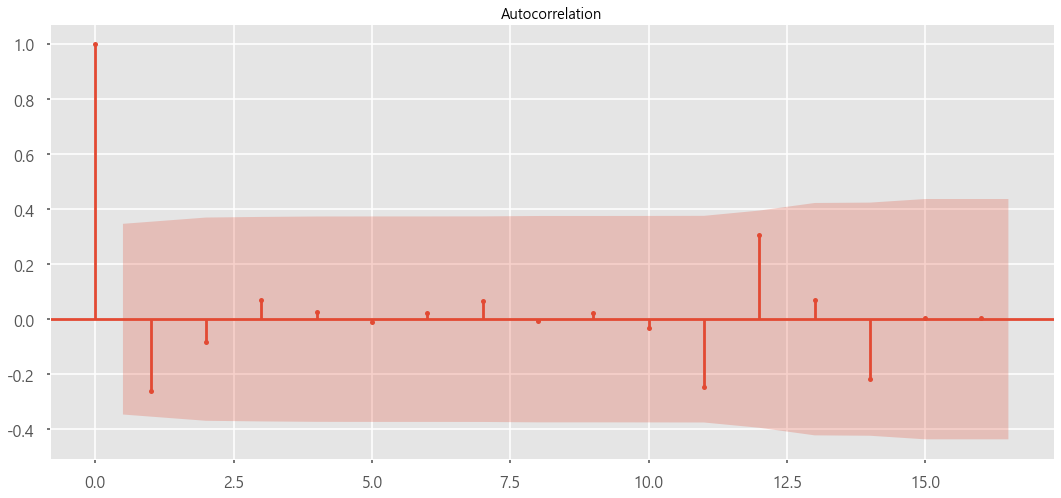

In [110]:
plot_acf(salesbymonth['1st diff'].dropna());

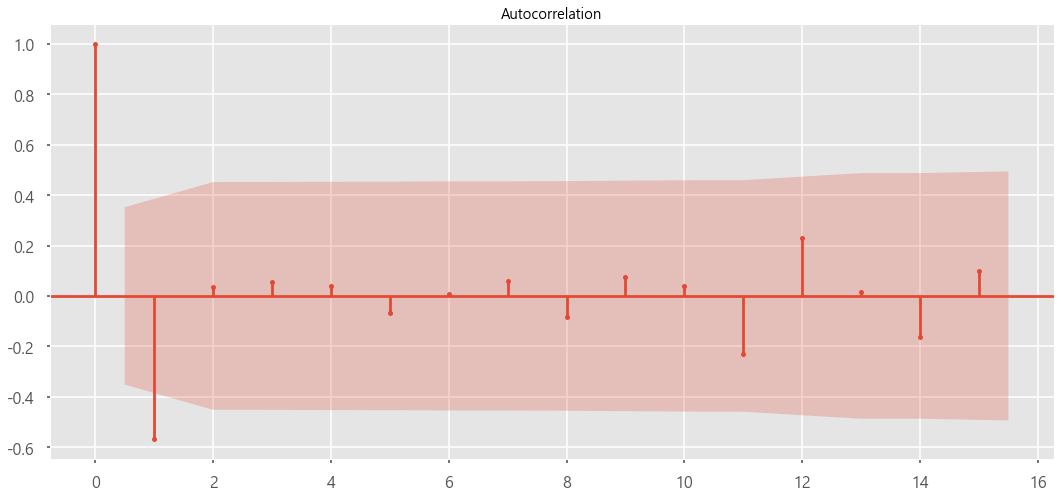

In [93]:
plot_acf(salesbymonth['2nd diff'].dropna());

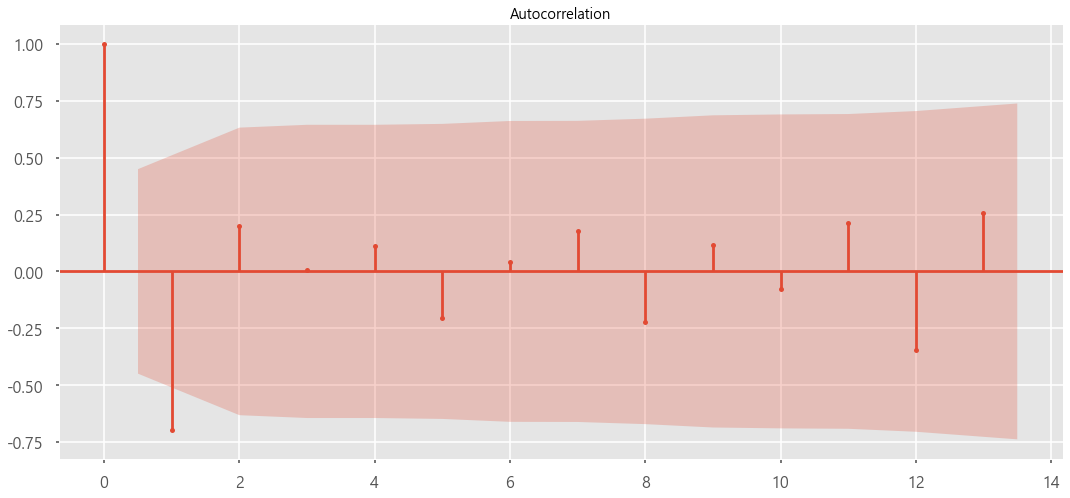

In [104]:
plot_acf(salesbymonth['seasonal 2nd diff'].dropna());

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 13 must be < 9.

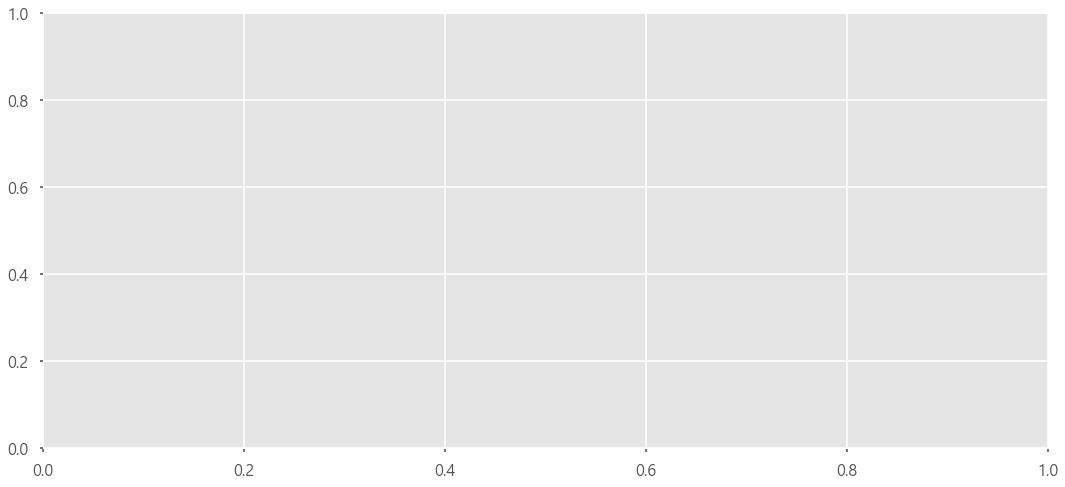

In [109]:
plot_pacf(salesbymonth['seasonal 2nd diff'].dropna(), method='ywm')#partial AutoCorrelation

In [111]:
# acf에서 음수 1개씩 나왔으므로 p, q값은 각 P=1. Q=1씀

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 16 must be < 16.

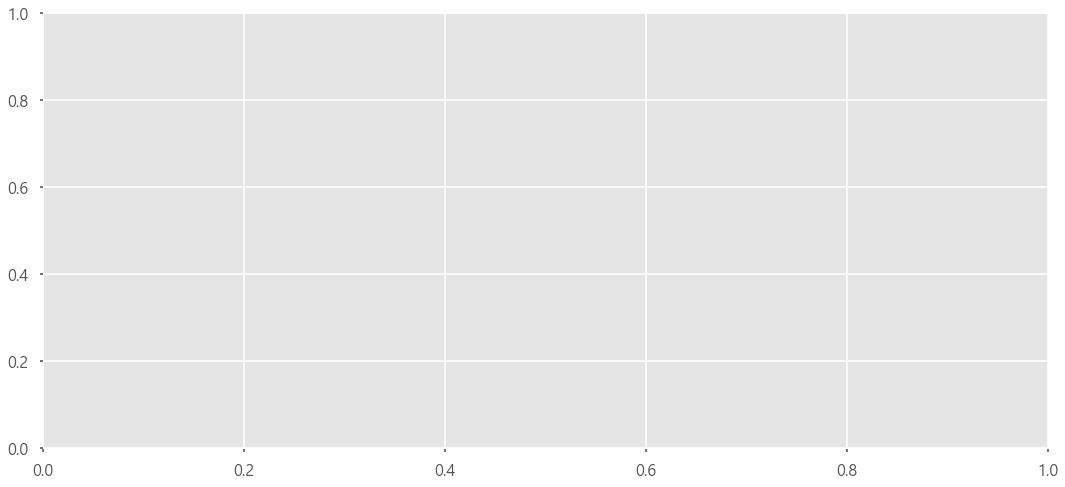

In [112]:
plot_pacf(salesbymonth['1st diff'].dropna(), method='ywm')#partial AutoCorrelation

In [27]:
#2016-2018 데이터를 train으로 2019 데이터를 test로 분리

split = "2019-01-01"
salesbymonth_train= salesbymonth[:split]
salesbymonth_test= salesbymonth[split:]

salesbymonth_test_final=salesbymonth_test.copy()

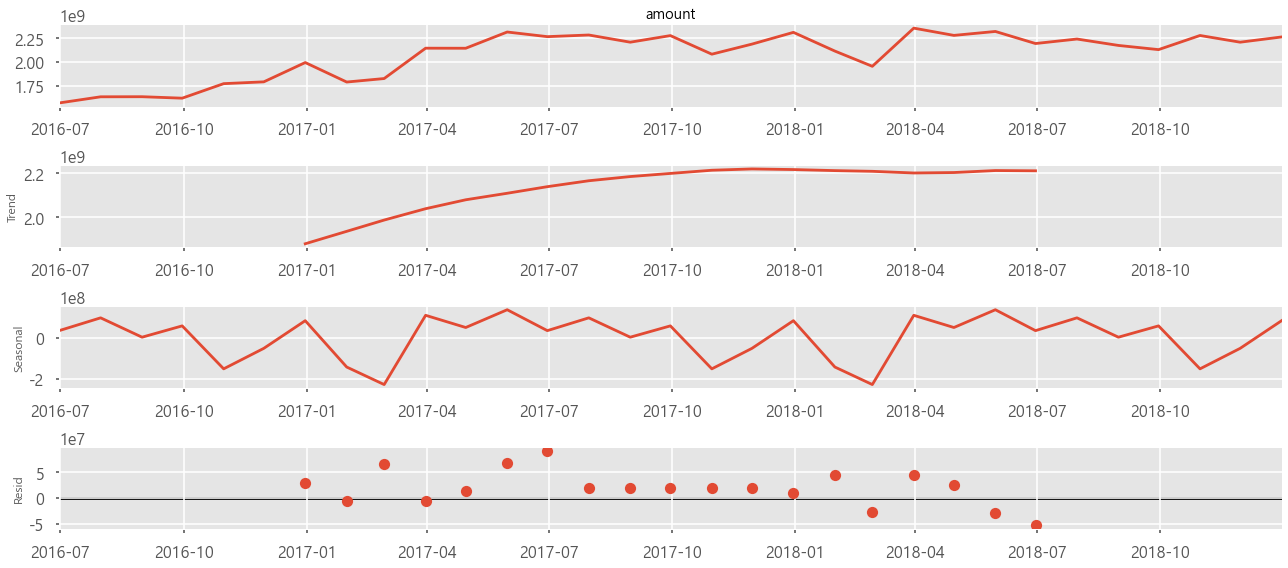

In [28]:
# 데이터를 시즌별로 분해해서 살펴 봄
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(salesbymonth_train, model='additive')
fig = decomposition.plot()
plt.show()

#마지막 그래프는 잔차를 의미

### 2017년 3월 2018년 2월까지 주기성이 보임, 점차적으로 증가하다 2018에서는 유지에서 머무르고 있다 ###

### 파라미터 찾기 ###

이제 본격적으로 ARIMA 모델을 만들어야 한다. ARIMA 모델을 만들기 위해 p, d, q 값을 지정해 주어야 하는데 일반적으로 p가 0이면 MA 모델을 따르고, q가 0이면 AR 모델을 따른다고 한다. d가 0이면 정상성을 보유한 모델이라고 보는데, 발생확률이 변하지 않는 ARMA 모델이라고 간주하면 된다고 한다. 우린 아직 이 데이터가 어떤 모형을 따르는 지 모르기 때문에 최적의 결과를 가져오는 p,d,q 값을 찾아야한다. 그 방법은 크게 두가지로 임의의 값들을 다 넣어 테스트 해보거나, pmdarima 패키지의 auto_arima 함수로 찾아내면 된다. 

In [29]:
#방법 1. p,d,q의 조합을 만들어 하나하나 ARIMA 모델을 돌려봄

#p,d,q 범위 생성 0~2
p = d = q = range(0, 2)

import itertools#반복되는 요소를 이어붙이는 모듈
pdqa = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#x의 0~2범위 요소를 하나씩 꺼내서 pdq를 리스트안에 붙여서 for 반복문 돌리기

for param in pdqa:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(salesbymonth_train, order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)                                
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1375.1996661841229
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1072.8447232155431
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:758.7415514208901
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:248.38548668454263
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:798.4677300538301
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:747.0271715939981
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:280.9251921095656
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:250.06458251371893
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1312.127774903771
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:769.4136389172355
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:703.4534888297045
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:207.3219680258705
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:857.7007691361664
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:769.9652689543188
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:287.96126259554524


C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:209.1664287576515
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1174.4009967548388
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:688.9937060883195
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:694.5679375522525
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:202.58022196551792
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:727.4313514821657
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:690.1938113862569
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:238.9283931976637
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:203.24062073740333
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1133.1819046189928
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:644.2336045709324
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:651.4805256795531
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:164.16523618880115
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:723.7682351056637
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:645.5927187727096
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:242.9661976295415
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:164.57452758458388
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1215.5662374915798


C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:730.1802825315546
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:728.1077364885259
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:244.7203416493899
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:729.0133669775703
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:730.9621327849505
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:242.36235035363262
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:244.35240011347528
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1173.0029334693636
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:685.5178479956068
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:681.8785415497586
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:204.6806370406607
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:723.8814377323366
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:685.3376828449401
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:241.55692386776002


C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:203.7181679584523
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1173.234353613563
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:687.3571380328792
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:689.495135631475
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:203.88557670735776
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:686.7270415543555
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:688.4681341378252
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:203.23338946591224
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:205.17859919208328
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1134.8510929377685
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:645.963291055858
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:652.2265182794737
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:165.8430663446108
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:685.370474938238
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:647.5246896093267
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:205.77538271066638
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:166.4309266592066


C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [31]:
!pip install pmdarima

In [129]:
#방법 2. auto_arima 함수로 자동 추출
from pmdarima import auto_arima
stepwise_model = auto_arima(salesbymonth_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=734.168, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=733.672, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=734.372, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=735.327, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=757.342, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=732.459, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=730.819, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=732.259, Time=0.18 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=732.823, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=731.860, Time=0.37 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=733.092, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,1,2)[12]          
Total fit time: 1.466 seconds


## 하이퍼 파라미터 정하기 ##
P=1, Q=1 
p=0, d=1, q=0
P=1, D=1, Q=1


### AIC(Akaike Information Criterion) 값이 제일 작은 조합을 선택 ###

### 학습 및 검증 ###

In [141]:
model = sm.tsa.statespace.SARIMAX(salesbymonth['amount'], order=(0,1,1), sesonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [142]:
result= model.fit()

In [143]:
result.summary()
#AIC	1296.617 모델 성능 의미 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 amount   No. Observations:                   33
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -647.260
Date:                Sun, 30 May 2021   AIC                           1298.519
Time:                        02:47:22   BIC                           1301.451
Sample:                    06-30-2016   HQIC                          1299.491
                         - 02-28-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0246      0.113     -0.218      0.828      -0.246       0.197
sigma2      2.168e+16   6.32e-19   3.43e+34      0.000    2.17e+16    2.17e+16
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.15   Prob(JB):                         0.55
Heteroskedasticity (H):               0.56   Skew:                             0.46
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='transacted_date'>

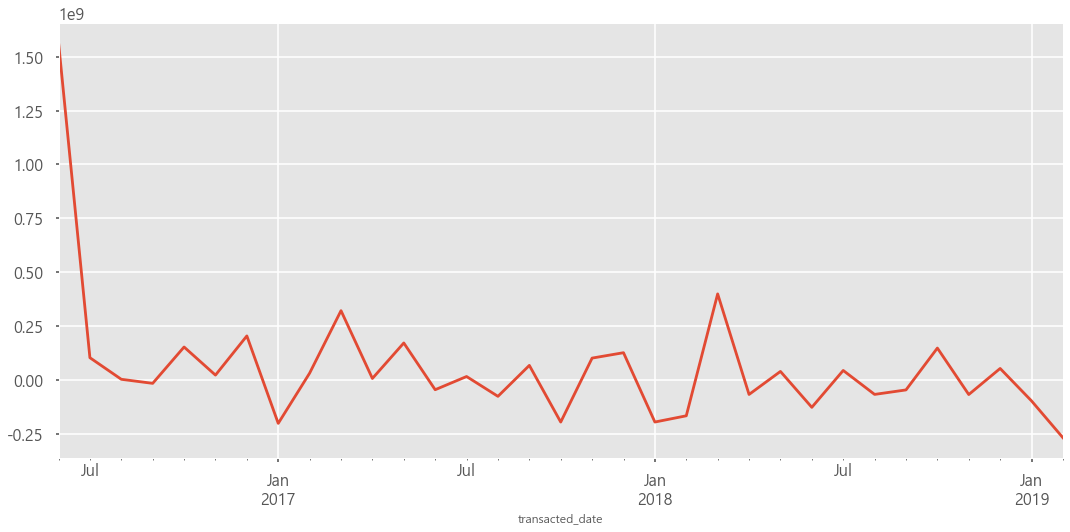

In [144]:
result.resid.plot()

<AxesSubplot:ylabel='Density'>

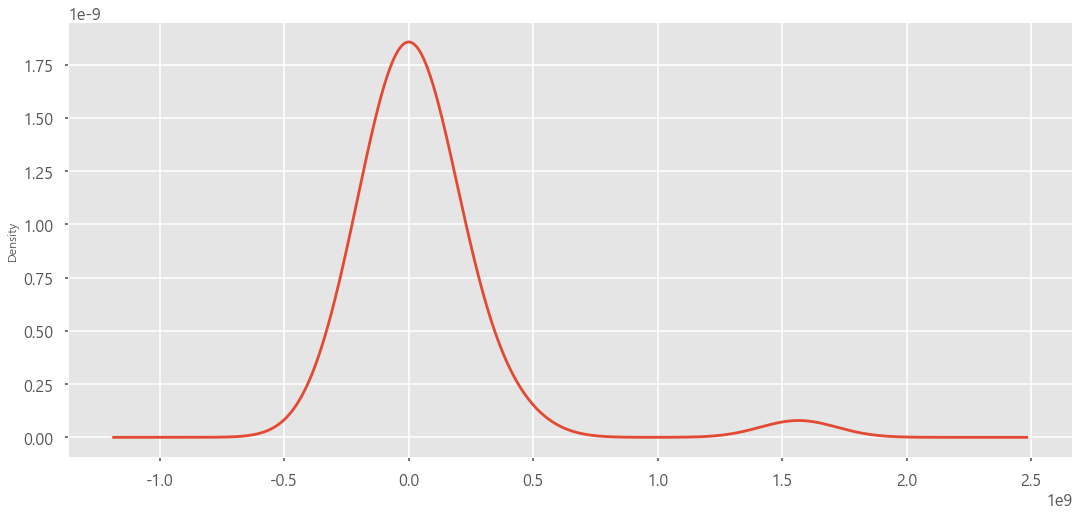

In [145]:
result.resid.plot(kind='kde')
# 가우스분포 0이므로 모델 피팅이 어느정도 된 것

## 예측 그래프 그려보기 ##

In [146]:
len(salesbymonth['amount'])

33

In [147]:
salesbymonth['forecast'] = result.predict(start=25, end=33, dynamic=True)

<AxesSubplot:xlabel='transacted_date'>

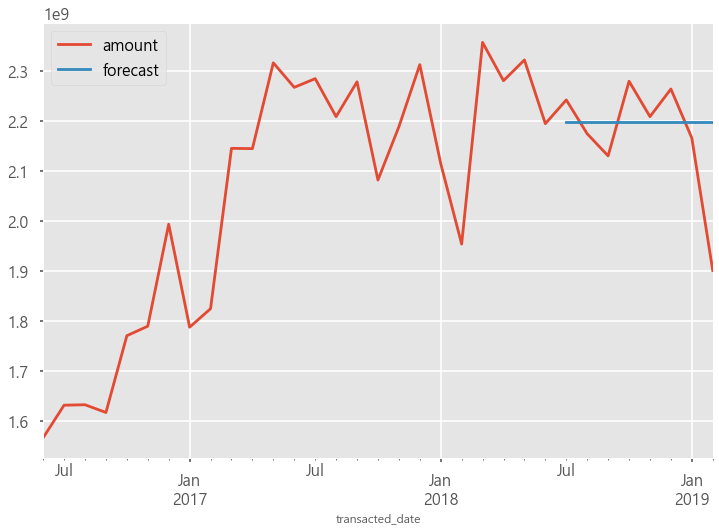

In [148]:
salesbymonth[['amount','forecast']].plot(figsize=(12,8))

## 하이퍼 파라미터를 수정해도 마찬가지임, 월별로 할 시 데이터 표본 수가 너무 적어서 그런 거 같음, 일별로 해서 다시 구해보기 ##